**INTRODUCTION**


In the realm of electrical engineering, understanding the behavior of circuits and components is paramount for designing efficient systems. One fundamental aspect of circuit analysis involves predicting the induced voltage across an inductor, a critical component in many electronic devices and systems. Traditionally, engineers rely on theoretical models and empirical equations to approximate the induced voltage based on circuit parameters such as inductance and current.

However, with the advent of advanced machine learning techniques, particularly the Kolmogorov-Arnold Networks (KAN), there arises a novel approach to finding formulas that describe complex electrical phenomena. KANs, inspired by the Kolmogorov-Arnold theorem, offer a powerful framework for discovering functional relationships between input variables and output responses.

The application of KANs in electrical engineering presents an exciting opportunity to uncover hidden patterns and nonlinear dependencies within circuit data. By training KANs on datasets containing circuit parameters and corresponding induced voltages, engineers can effectively leverage the network's capacity to learn and generalize complex relationships.

In this study, we aim to utilize KANs to derive a formula for the induced voltage across an inductor based on circuit parameters. By harnessing the computational power of KANs, we seek to transcend traditional modeling limitations and uncover a precise mathematical representation of the induced voltage phenomenon. This approach holds the promise of enhancing our understanding of inductor behavior and facilitating the design of more efficient and reliable electrical systems. Through empirical validation and comparison with established models, we aim to demonstrate the effectiveness and utility of KANs in the domain of electrical engineering.

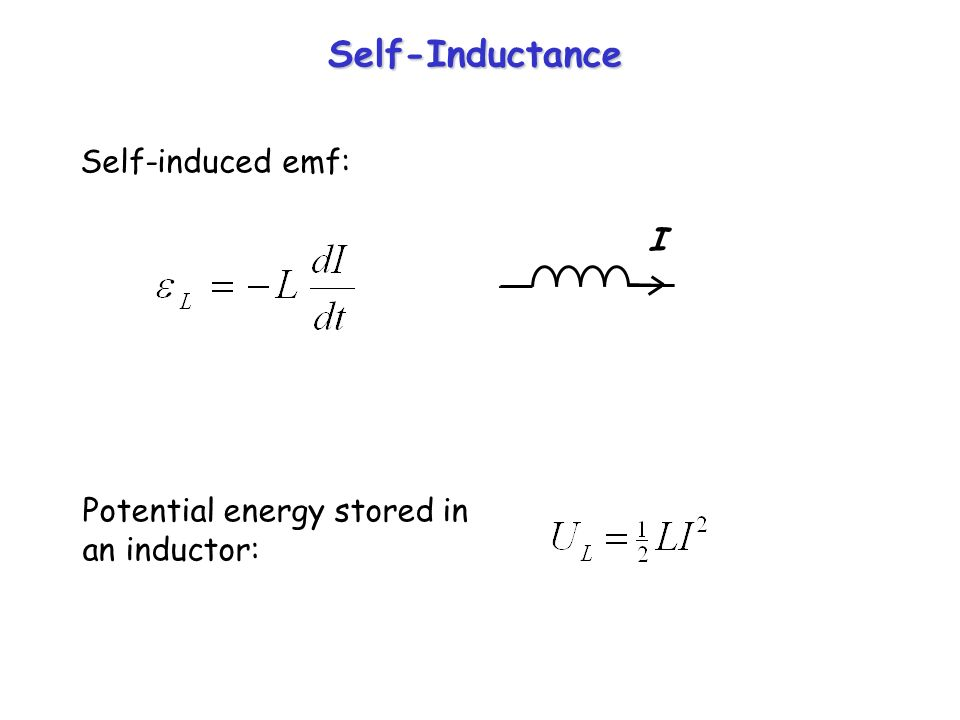

**Data Generation**

The inductance (H) is held constant and simulating the current flowing through the inductor and the example used is the sinusoidal current.

In [ ]:
import numpy as np

# Simulation parameters
time_points = np.linspace(0, 10, 100)  # Time points
L = 1.0  # Inductance (H)
R = 1.0  # Resistance (ohm)

# Simulate current flowing through the inductor (example: sinusoidal current)
i = np.sin(time_points)

# Compute the rate of change of current (di/dt)
di_dt = np.gradient(i, time_points)

# Calculate the voltage across the inductor (VL) using the Inductor Voltage Equation
VL = L * di_dt

# Print the first few values of current, di/dt, and VL
print("Time (t):", time_points[:5])
print("Current (i(t)):", i[:5])
print("Rate of change of current (di/dt):", di_dt[:5])
print("Inductor Voltage (VL(t)):", VL[:5])


Time (t): [0.        0.1010101 0.2020202 0.3030303 0.4040404]
Current (i(t)): [0.         0.10083842 0.20064886 0.2984138  0.39313661]
Rate of change of current (di/dt): [0.99830036 0.99321184 0.97799815 0.95281439 0.91791729]
Inductor Voltage (VL(t)): [0.99830036 0.99321184 0.97799815 0.95281439 0.91791729]


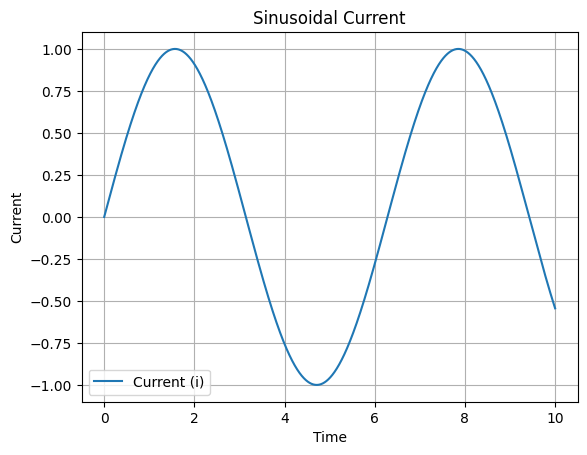

In [93]:
# Plot the sinusoidal wave
plt.plot(time_points, i, label='Current (i)')
plt.xlabel('Time')
plt.ylabel('Current')
plt.title('Sinusoidal Current')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Number of rows
num_rows = 5000

# Simulation parameters
time_points = np.linspace(0, 10, num_rows)  # Time points
L = 1.0  # Inductance (H)

# Simulate current flowing through the inductor (example: sinusoidal current)
i = np.sin(time_points)

# Compute the rate of change of current (di/dt)
di_dt = np.gradient(i, time_points)

# Calculate the voltage across the inductor (VL) using the Inductor Voltage Equation
VL = L * di_dt

# Create DataFrame
data = pd.DataFrame({'Time': time_points, 'Current': i, 'Rate_of_change_of_current': di_dt, 'Inductor_Voltage': VL})

# Save DataFrame to CSV
data.to_csv('inductor_voltage_data.csv', index=False)

print("CSV file saved successfully.")


CSV file saved successfully.


In [ ]:
#Reading the data from the csv file
df = pd.read_csv('/content/inductor_voltage_data.csv')
df

,Time,Current,Rate_of_change_of_current,Inductor_Voltage
0,0.000000,0.000000,0.999999,0.999999
1,0.002000,0.002000,0.999997,0.999997
2,0.004001,0.004001,0.999991,0.999991
3,0.006001,0.006001,0.999981,0.999981
4,0.008002,0.008002,0.999967,0.999967
...,...,...,...,...
4995,9.991998,-0.537290,-0.843397,-0.843397
4996,9.993999,-0.538976,-0.842321,-0.842321
4997,9.995999,-0.540660,-0.841241,-0.841241
4998,9.998000,-0.542342,-0.840158,-0.840158


**Installation of the KAN Library**

In [ ]:
!pip install pykan

In [ ]:
!pip install git+https://github.com/KindXiaoming/pykan.git

  Cloning https://github.com/KindXiaoming/pykan.git to /tmp/pip-req-build-q_wh4bjr
  Running command git clone --filter=blob:none --quiet https://github.com/KindXiaoming/pykan.git /tmp/pip-req-build-q_wh4bjr
  Resolved https://github.com/KindXiaoming/pykan.git to commit ef4861ebe6160e037f45a32b43950b4fb5fafa52
  Preparing metadata (setup.py) ... done


**Importing The Libraries To Use**

In [ ]:
import pandas as pd
from kan import KAN, create_dataset
import torch
import numpy as np
import matplotlib.pyplot as plt

**Data Processing**

In [ ]:
import pandas as pd
import torch
from kan import create_dataset

# Load data from CSV file
data = pd.read_csv('/content/inductor_voltage_data.csv')  # Replace '/content/inductor_voltage_data.csv' with your actual file path

# Assuming the dataset contains columns for time, current, rate of change of current and Induced voltage
X = data[['Time', 'Current', 'Rate_of_change_of_current']].values  # Input features: time, current, and rate of change of current
y = data['Inductor_Voltage'].values.reshape(-1, 1)  # Output: inductor voltage

# Define a function to transform data (if needed)
def f(x):
    return x

# Create dataset
train_num = X.shape[0]  # Number of rows in the data
dataset = create_dataset(f, n_var=3, train_num=train_num)  # 3 input features

# Assign training input and labels to the dataset
dataset['train_input'] = torch.tensor(X, dtype=torch.float32)  # Convert to PyTorch tensor
dataset['train_label'] = torch.tensor(y, dtype=torch.float32)  # Convert to PyTorch tensor

# Generate test input and labels (you can split the data if needed)
dataset['test_input'] = torch.tensor(X, dtype=torch.float32)  # Using the same data for testing
dataset['test_label'] = torch.tensor(y, dtype=torch.float32)  # Using the same data for testing

# Display shapes of train input and train label
print("Train input shape:", dataset['train_input'].shape)
print("Train label shape:", dataset['train_label'].shape)
print("Test input shape:", dataset['test_input'].shape)
print("Test label shape:", dataset['test_label'].shape)


Train input shape: torch.Size([5000, 3])
Train label shape: torch.Size([5000, 1])
Test input shape: torch.Size([5000, 3])
Test label shape: torch.Size([5000, 1])


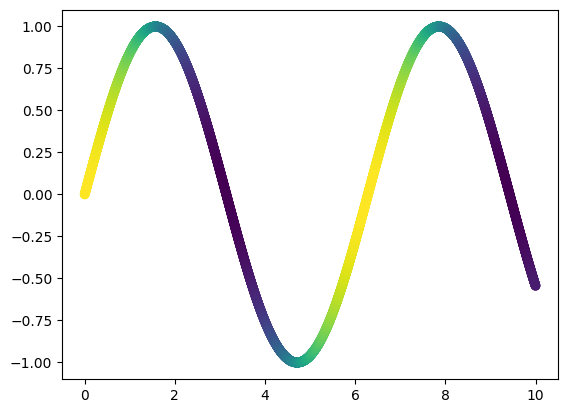

In [ ]:
#Plotting the training the Data
X = dataset['train_input']
y = dataset['train_label']
plt.scatter(X[:,0], X[:,1], c=y[:])

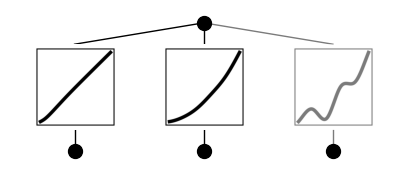

In [ ]:
# Plot KAN at initialization
# Create a KAN: 3D inputs and 1D output. Cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[3,1], grid=5, k=3, seed=0)
model(dataset['train_input'])
model.plot(beta=100)

train loss: 4.59e-04 | test loss: 4.59e-04 | reg: 1.59e+00 : 100%|██| 20/20 [00:04<00:00,  4.02it/s]


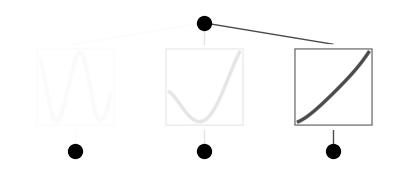

In [ ]:
# model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);
model.train(dataset, opt="LBFGS", steps=20);
model.plot()

train loss: 3.62e-04 | test loss: 3.62e-04 | reg: 1.57e+00 : 100%|██| 20/20 [00:04<00:00,  4.01it/s]


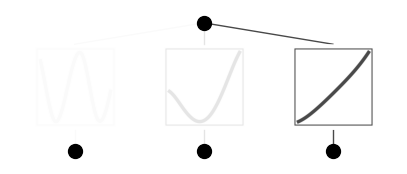

In [ ]:
# Continue training the model
model.prune()
model.train(dataset, opt="LBFGS", steps=20);
model.plot()

train loss: 2.37e-04 | test loss: 2.37e-04 | reg: 1.33e+00 : 100%|██| 20/20 [00:06<00:00,  3.26it/s]


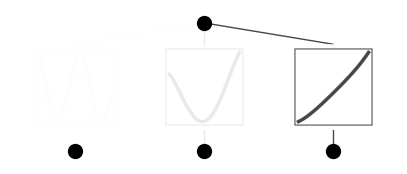

In [ ]:
# model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);
model.train(dataset, opt="LBFGS", steps=20);
model.plot() #plot the model

**Fixing Activation Functions After Training**

In [ ]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.9973735809326172
fixing (0,1,0) with sin, r2=0.9955241084098816
fixing (0,2,0) with x^2, r2=0.9998708367347717


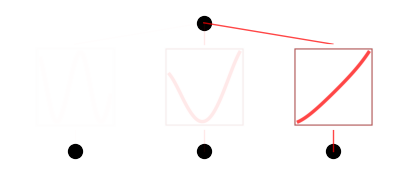

In [ ]:
#Plot the trained model
model.plot()

**The Formula From the Model**

In [ ]:
#The Inductor Voltage Equation from the model
formula1 = model.symbolic_formula()[0][0]
formula1

1.46*(-0.33*x_3 - 1)**2 + 0.05*sin(1.0*x_1 - 4.02) + 0.14*sin(1.83*x_2 - 1.38) - 1.49

**Assessing The Model Accuracy**

In [ ]:
 import torch

def acc_from_formula(formula1, X, y):
    """
    Calculate accuracy of the formula given input features and true labels.

    Parameters:
        formula1 (function): The formula function to evaluate.
        X (torch.Tensor): Input features.
        y (torch.Tensor): True labels.

    Returns:
        float: Accuracy of the formula.
    """
    batch = X.shape[0]
    correct = 0
    for i in range(batch):
        # Evaluate the formula function for the ith sample
        prediction = formula1(X[i, 0], X[i, 1], X[i, 2])  # Assuming X has 3 features
        # Convert the prediction to a probability between 0 and 1 using the sigmoid function
        probability = torch.sigmoid(prediction)
        # Check if the predicted probability matches the true label
        correct += torch.abs(probability - y[i]) < 0.5  # Adjust the threshold as needed
    return correct / batch

# Define the formula function
def formula(x1, x2, x3):
    return (
        1.46 * (-0.33 * x3 - 1) ** 2 + 0.05 * torch.sin(1.0 * x1 - 4.02) + 0.14 * torch.sin(1.83 * x2 - 1.38) - 1.49
    )
#Other Equations generated from training with different parameters
# Define the formula function
def formula5(x1, x2, x3):
    return (
        1.9 * torch.log(-5.97 * (-0.34 * x3 - 1) ** 3 - 0.43 * torch.sin(1.0 * x1 - 0.99) + 0.46 * torch.sin(1.63 * x2 - 7.4) + 6.31) - 4.76
    )
# Define the formula function
def formula4(x1, x2, x3):
    return (
        -14.05 * 0.47 * torch.exp(0.01 * x1)
        - 0.01 * torch.tanh(0.68 * x3 + 0.43)
        - 0.92
        - 0.09 * torch.exp(0.39 * x3)
        - 0.04 * torch.tanh(0.42 * x1 - 1.89)
        + 1 - 0.9 - 18.42 * (-0.83 - 0.01 * (-0.74 * x2 - 1) ** 3 + 0.16 * torch.exp(0.39 * x3) + 0.06 * torch.tanh(0.42 * x1 - 1.89) + 0.17 * torch.log(abs(44.02 * torch.exp(0.01 * x1) - 0.39 * torch.tanh(0.68 * x3 + 0.43) + 0.06 * abs(6.98 * x2 + 6.36)) - 38.16))
        - 0.01 * torch.sin(0.15 * (-x2 - 0.47) ** 2 - 1.18 * torch.sin(0.7 * x3 - 3.54) + 0.72 * torch.tanh(0.36 * x1 - 1.6) - 0.07) + 1 + 18.82
    )
# Define the formula function
def formula3(x1, x2, x3):
    return -18.5 - 0.72*(1 - 0.02*x1)**2 + 0.01*torch.tanh(1.02*x2 + 0.59) - 0.01*torch.tanh(1.69*x3 + 0.93) + (1 - 1.98*torch.sin(0.02*(0.18 - x2)**4 - 0.48*(-0.23*x3 - 1)**3 + 1.16*torch.tanh(0.2*x1 - 0.87) + 8.72)) + 12.03

# Define the formula function
def formula2(x1, x2, x3):
    return 62301.6*(torch.sin(0.01*x1 - 4.0) - 0.73)**3 - 1.24*torch.log(-2.65*torch.sin(1.44*x2 + 9.2) - 0.49*torch.tanh(5.98*x3 + 4.76) + 422.48 - 414.56*torch.exp(-0.01*x1)) + 1.87*torch.tanh(-0.51*torch.log(2.87 - 1.23*x3) + 1.36*torch.sin(0.18*x1 + 5.51) + 0.15*torch.tanh(2.33*x2 - 1.23) + 0.8) + 3.79

# Calculate accuracy using the formula function and dataset
accuracy = acc_from_formula(formula, dataset['test_input'], dataset['test_label'])
print('Accuracy of the formula:', accuracy)


Accuracy of the formula: tensor([0.4710])


**Testing The Equation with The Actual values in the CSV file**

In [96]:
import torch
#row No=4969   time = 9.993999	, current = -0.538976 and the change of rate of current =	-0.842321
#the actual induced  voltage	-0.842321

# Define the formula function
def formula5(x1, x2, x3):
    return (
        1.46 * (-0.33 * x3 - 1) ** 2 + 0.05 * torch.sin(1.0 * x1 - 4.02) + 0.14 * torch.sin(1.83 * x2 - 1.38) - 1.49
    )

# Input values (replace with actual values if available)
x1 = torch.tensor(9.993999)  #Time
x2 = torch.tensor(-0.538976) #Current
x3 = torch.tensor(-0.842321) #Current rate of change

# Calculate the result using the formula
result = formula5(x1, x2, x3)

# Print the calculated result
print("Result:", result.item())


Result: -0.8420546054840088


**Measuring The Error From The Measurements**

The error from a measurement, typically used in the context of evaluating the performance of a model, is often calculated as the difference between the predicted (or measured) value and the actual (ground truth) value. This error is often referred to as the residual.

Having a small error is desirable because it indicates that the model's predictions are accurate and close to the ground truth.

In [ ]:
def calculate_error(predicted_value, actual_value):
    return predicted_value - actual_value

def calculate_percent_error(predicted_value, actual_value):
    error = calculate_error(predicted_value, actual_value)
    return (error / actual_value) * 100

# Example usage:
predicted_value = -0.8420546054840088
actual_value = -0.842321

error = calculate_error(predicted_value, actual_value)
percent_error = calculate_percent_error(predicted_value, actual_value)

print("Error:", error)
print("Percent Error:", percent_error)


Error: 0.00026639451599119734
Percent Error: -0.03162624652492308
